#### **Predicción de Diabetes con Regresión Logística**

**Análisis Exploratorio de Datos (EDA)**

In [1]:
#librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# lectura de data 

Data = pd.read_csv('C:/Users/Lyola/Documents/Yolanda/Aprendizaje autonomo/Aprendizaje/Portafolio/Case Study/Predicción de Diabetes con Regresión Logística/Diabetes.csv')

In [3]:
# lectura de los Datos para el análisis EDA

Data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# Descripción de los datos
Data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


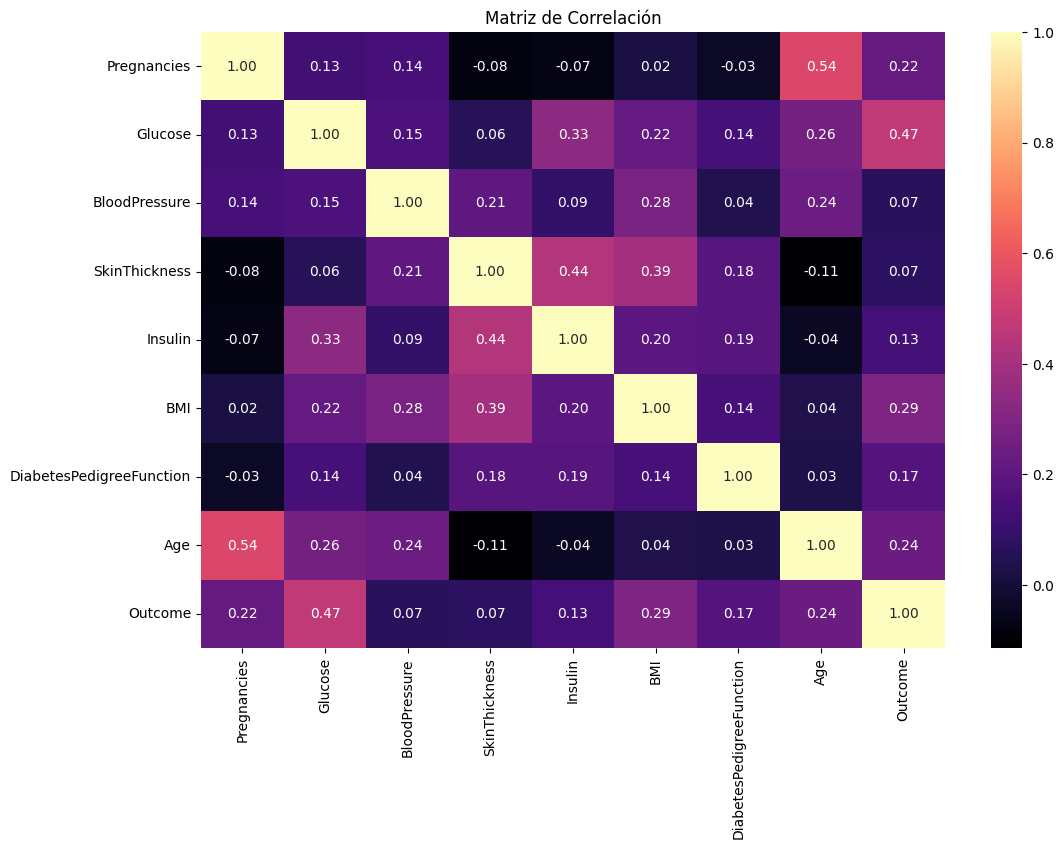

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(Data.corr(), annot=True, cmap='magma', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

Outcome (variable objetivo) tiene mayores correlaciones con:
- Glucose (0.47) → Buena correlación positiva.
- BMI (0.29) → Relación moderada.
- Age (0.24) → Relación baja, pero podría aportar algo de información.
- Pregnancies (0.22) → También tiene cierta relación.

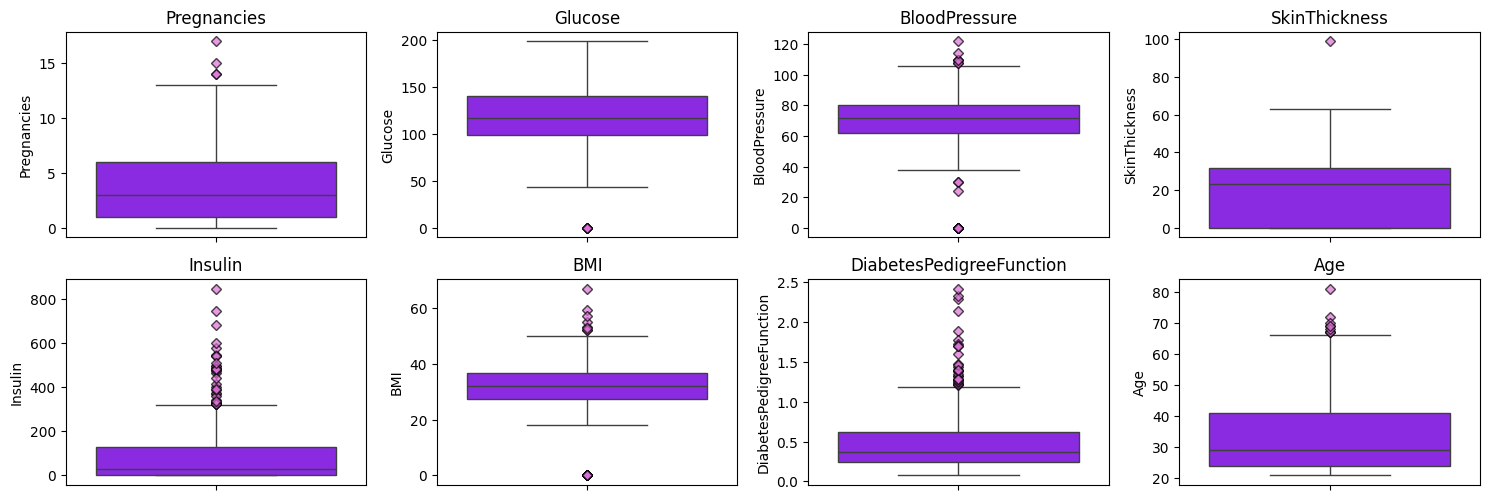

In [ ]:
plt.figure(figsize=(15, 10))
flierprops = dict(marker='D', markerfacecolor='#DA70D6', markeredgecolor='black', markersize=5, alpha=0.7)

for i, col in enumerate(Data.columns[:-1]):  # Excluir la variable objetivo
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=Data[col], flierprops=flierprops, boxprops=dict(facecolor='#8A2BE2'))  
    plt.title(col)

plt.tight_layout()
plt.show()

**Limpieza y Transformación de Datos (Data Cleaning)**

In [23]:
#Revisión de datos faltantes

print("Cant. Registros con 0 en Nivel de Glucosa: ",Data['Glucose'].isin([0]).sum())
print("Cant. Registros con 0 en Presión Arterial: ",Data['BloodPressure'].isin([0]).sum())
print("Cant. Registros con 0 en Grosor Piel: ",Data['SkinThickness'].isin([0]).sum())
print("Cant. Registros con 0 en Nivel Insulina: ",Data['Insulin'].isin([0]).sum())
print("Cant. Registros con 0 en IMC: ",Data['BMI'].isin([0]).sum())

Cant. Registros con 0 en Nivel de Glucosa:  5
Cant. Registros con 0 en Presión Arterial:  35
Cant. Registros con 0 en Grosor Piel:  227
Cant. Registros con 0 en Nivel Insulina:  374
Cant. Registros con 0 en IMC:  11


In [26]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Data['Glucose']=Data['Glucose'].replace(0,Data['Glucose'].mean())
Data['BloodPressure']=Data['BloodPressure'].replace(0,Data['BloodPressure'].mean())
Data['SkinThickness']=Data['SkinThickness'].replace(0,Data['SkinThickness'].mean())
Data['Insulin']=Data['Insulin'].replace(0,Data['Insulin'].mean())
Data['BMI']=Data['BMI'].replace(0,Data['BMI'].mean())

In [27]:
#Revisión de datos faltantes

print("Cant. Registros con 0 en Nivel de Glucosa: ",Data['Glucose'].isin([0]).sum())
print("Cant. Registros con 0 en Presión Arterial: ",Data['BloodPressure'].isin([0]).sum())
print("Cant. Registros con 0 en Grosor Piel: ",Data['SkinThickness'].isin([0]).sum())
print("Cant. Registros con 0 en Nivel Insulina: ",Data['Insulin'].isin([0]).sum())
print("Cant. Registros con 0 en IMC: ",Data['BMI'].isin([0]).sum())

Cant. Registros con 0 en Nivel de Glucosa:  0
Cant. Registros con 0 en Presión Arterial:  0
Cant. Registros con 0 en Grosor Piel:  0
Cant. Registros con 0 en Nivel Insulina:  0
Cant. Registros con 0 en IMC:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

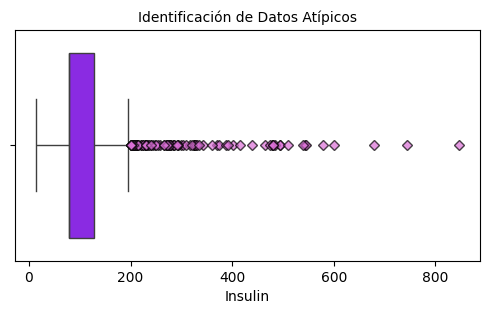

In [30]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
flierprops = dict(marker='D', markerfacecolor='#DA70D6', markeredgecolor='black', markersize=5, alpha=0.7)
sns.boxplot(x=Data['Insulin'], flierprops=flierprops, boxprops=dict(facecolor='#8A2BE2'))
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [31]:
#Conteo de Datos Atípicos

nivel_minimo=20
nivel_maximo=800
Total_Atipicos=((Data['Insulin']<nivel_minimo)|(Data['Insulin']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 6


In [34]:
# Filtra Datos Atípicos

Data=Data[(Data['Insulin']<nivel_maximo)&(Data['Insulin']>nivel_minimo)]

In [35]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Data['Insulin']<nivel_minimo)|(Data['Insulin']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [36]:
#Revisión del tipo de datos y datos faltantes

Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               762 non-null    int64  
 1   Glucose                   762 non-null    float64
 2   BloodPressure             762 non-null    float64
 3   SkinThickness             762 non-null    float64
 4   Insulin                   762 non-null    float64
 5   BMI                       762 non-null    float64
 6   DiabetesPedigreeFunction  762 non-null    float64
 7   Age                       762 non-null    int64  
 8   Outcome                   762 non-null    int64  
 9   Nivel_Insulina            762 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 65.5 KB


**Elección de las mejores características para el modelo**

Característica de interes:

- Diabetico: si la persona tiene diabetes o no (0 = no tiene diabetes - 1 = si tiene diabetes)
- Predecir si una persona puede tener diabetes

In [38]:
# Total de personas con Diabetes

Data['Outcome'].value_counts()

Outcome
0    496
1    266
Name: count, dtype: int64

**Separación de datos para entrenamiento y prueba (test & train)**

In [40]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Data.drop('Outcome',axis=1) # Se cargan los datos de train sin los datos de la columna Diagnostico 
Y = Data['Outcome'] # Se cargan los datos de train con los datos de la la columna Diagnostico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [41]:
print (X_train)

     Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
499            6  154.000000           74.0      32.000000  193.000000  29.3   
183            5   73.000000           60.0      20.536458   79.799479  26.8   
260            3  191.000000           68.0      15.000000  130.000000  30.9   
615            3  106.000000           72.0      20.536458   79.799479  25.8   
114            7  160.000000           54.0      32.000000  175.000000  30.5   
..           ...         ...            ...            ...         ...   ...   
267            2  128.000000           64.0      42.000000   79.799479  40.0   
502            6  120.894531           68.0      41.000000   79.799479  39.0   
218            5   85.000000           74.0      22.000000   79.799479  29.0   
537            0   57.000000           60.0      20.536458   79.799479  21.7   
436           12  140.000000           85.0      33.000000   79.799479  37.4   

     DiabetesPedigreeFunction  Age  Niv

In [42]:
print (X_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
315            2    112.0           68.0      22.000000   94.000000  34.1   
199            4    148.0           60.0      27.000000  318.000000  30.9   
341            1     95.0           74.0      21.000000   73.000000  25.9   
676            9    156.0           86.0      20.536458   79.799479  24.8   
58             0    146.0           82.0      20.536458   79.799479  40.5   
..           ...      ...            ...            ...         ...   ...   
432            1     80.0           74.0      11.000000   60.000000  30.0   
165            6    104.0           74.0      18.000000  156.000000  29.9   
464           10    115.0           98.0      20.536458   79.799479  24.0   
415            3    173.0           84.0      33.000000  474.000000  35.7   
241            4     91.0           70.0      32.000000   88.000000  33.1   

     DiabetesPedigreeFunction  Age  Nivel_Insulina  
315                   

**Entrenamiento del modelo con ajuste de hiperparámetros**

In [43]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [44]:
X_test.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Nivel_Insulina
315,2,112.0,68.0,22.000000,94.000000,34.1,0.315,26,94.000000
199,4,148.0,60.0,27.000000,318.000000,30.9,0.150,29,318.000000
341,1,95.0,74.0,21.000000,73.000000,25.9,0.673,36,73.000000
676,9,156.0,86.0,20.536458,79.799479,24.8,0.230,53,79.799479
58,0,146.0,82.0,20.536458,79.799479,40.5,1.781,44,79.799479
649,0,107.0,60.0,25.000000,79.799479,26.4,0.133,23,79.799479
597,1,89.0,24.0,19.000000,25.000000,27.8,0.559,21,25.000000
112,1,89.0,76.0,34.000000,37.000000,31.2,0.192,23,37.000000
467,0,97.0,64.0,36.000000,100.000000,36.8,0.600,25,100.000000
27,1,97.0,66.0,15.000000,140.000000,23.2,0.487,22,140.000000


In [45]:

print (Prediccion)

[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 1 0]


**Análisis de desempeño con precisión, recall y F1-score**

In [46]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       124
           1       0.71      0.54      0.61        67

    accuracy                           0.76       191
   macro avg       0.74      0.71      0.72       191
weighted avg       0.75      0.76      0.75       191



**Visualización de los datos**

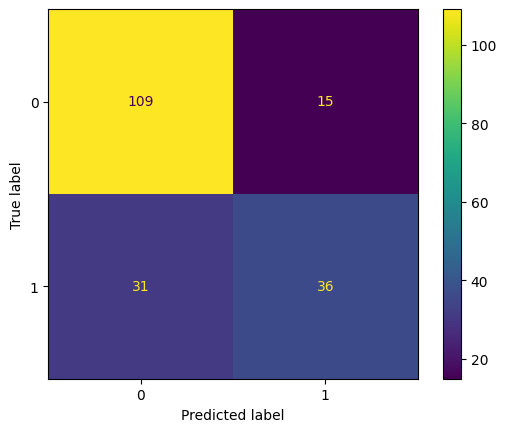

In [47]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

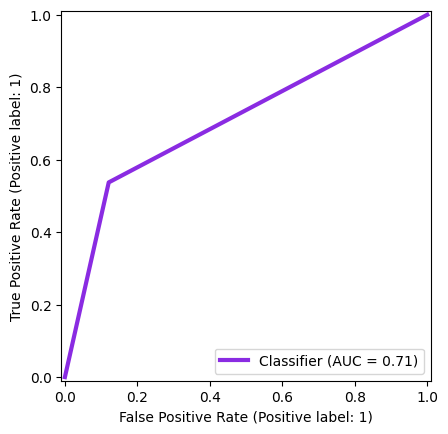

In [49]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion, color='#8A2BE2', linewidth=3)
plt.show()

**Interpretación, analisis y documentación de los resultados obtenidos**

Del desempeño del modelo se puede describir:

- Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. Aquí la precisión para la clase "Outcome-diagnostico" es 0,71, lo que significa que el 71% de los predichos como diabéticos por el modelo eran en realidad diabéticos.

- Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí el Recall para la clase "Outcome-diagnostico" es 0,54, lo que indica que el modelo identificó correctamente al 54% de todos los diabéticos.

- F1 Score: Es la media armónica de precisión y recall. Proporciona una puntuación única que equilibra la precisión y recall. Aquí la puntuación F1 para la clase "Outcome-diagnostico" es 0,61, lo que indica un equilibrio entre precisión y recall.

De la Matriz de Confusión podemos interpretar:

- Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 109
- Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 36
- Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 15
- Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como falso 31

De la curva de precisión del modelo se puede interpretar:

- El AUC es 0,71 lo que significa que el 71% de las predicciones del clasificador son correctas en todos los umbrales de clasificación.